# Checking Cythonized functions against their python  variants
## Result:
### Things are same upto order ~1e-12 in abs[F(f)] and ~1e-14 in phase[F(f)]. Thus, Cythonised class is as accurate.

In [1]:
import numpy as np

import sys
import mpmath
from mpmath import hyp1f1
import math
import scipy

from itertools import product
from functools import partial
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

# loading Python version of the point lens class
import pnt_lens_class 
pnt_lens_py = pnt_lens_class.point_lens()

# loading Cython version of the point lens class
import cythonized_pnt_lens_class as pnt_lens_cy



## (i) Wave Optics Regime

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 64.30it/s]


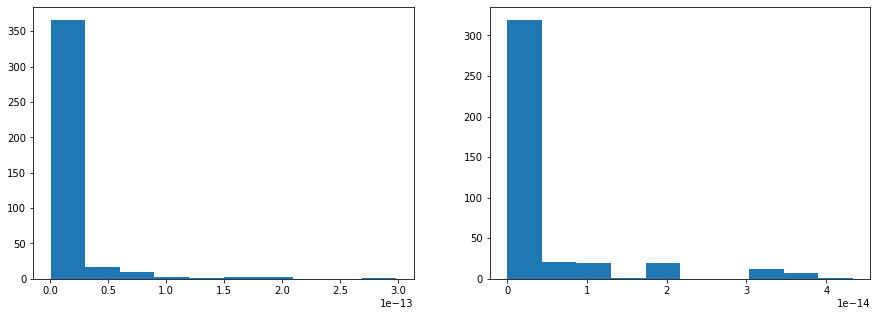

In [7]:
Mlzs = np.logspace(1, 5, 20)
ys = np.logspace(-2, np.log10(5), 20)
input_prms = np.array(list(product(Mlzs, ys)))
fs = np.arange(0.25, 10, 1/4)
max_abs_err_abs_arr = np.array([None]*len(input_prms))
max_abs_err_phase_arr = np.array([None]*len(input_prms))
i=0
for inp in tqdm(input_prms):
    Mlz, y = inp
    wfs = [pnt_lens_cy.w_of_f(f, ml=Mlz, zl=0) for f in fs]
    Ffs_py = np.array([pnt_lens_py.point_Fw(wf, y=y) for wf in wfs])
    Ffs_cy = np.array([pnt_lens_cy.point_Fw(wf, y=y) for wf in wfs])
    max_abs_err_abs = np.max(np.abs(np.abs(Ffs_py) - np.abs(Ffs_cy)))
    max_abs_err_phase = np.max(np.abs(np.angle(Ffs_py) - np.angle(Ffs_cy)))
    max_abs_err_abs_arr[i] = max_abs_err_abs
    max_abs_err_phase_arr[i] = max_abs_err_phase
    i+=1
    
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(max_abs_err_abs_arr)
ax[1].hist(max_abs_err_phase_arr)
plt.show()    

## (ii) Quasi-Geometric Optics Regime

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [03:00<00:00,  4.98it/s]


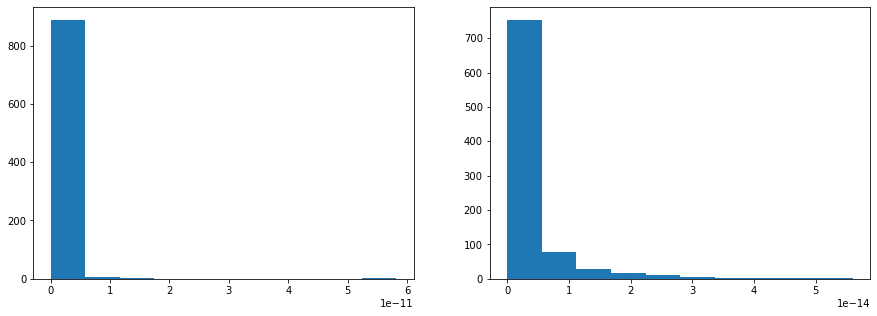

In [11]:
Mlzs = np.logspace(1, 5, 30)
ys = np.logspace(-2, np.log10(5), 30)
input_prms = np.array(list(product(Mlzs, ys)))
fs = np.arange(0.25, 1024, 1/4)
max_abs_err_abs_arr = np.array([None]*len(input_prms))
max_abs_err_phase_arr = np.array([None]*len(input_prms))
i=0
for inp in tqdm(input_prms):
    Mlz, y = inp
    wfs = [pnt_lens_cy.w_of_f(f, ml=Mlz, zl=0) for f in fs]
    Ffs_py = np.array([pnt_lens_py.point_Fw_qgeo(wf, y=y) for wf in wfs])
    Ffs_cy = np.array([pnt_lens_cy.point_Fw_qgeo(wf, y=y) for wf in wfs])
    max_abs_err_abs = np.max(np.abs(np.abs(Ffs_py) - np.abs(Ffs_cy)))
    max_abs_err_phase = np.max(np.abs(np.angle(Ffs_py) - np.angle(Ffs_cy)))
    max_abs_err_abs_arr[i] = max_abs_err_abs
    max_abs_err_phase_arr[i] = max_abs_err_phase
    i+=1
    
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(max_abs_err_abs_arr)
ax[1].hist(max_abs_err_phase_arr)
plt.show()    

## (iii) Geometric-Optics Regime

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [01:09<00:00, 12.87it/s]


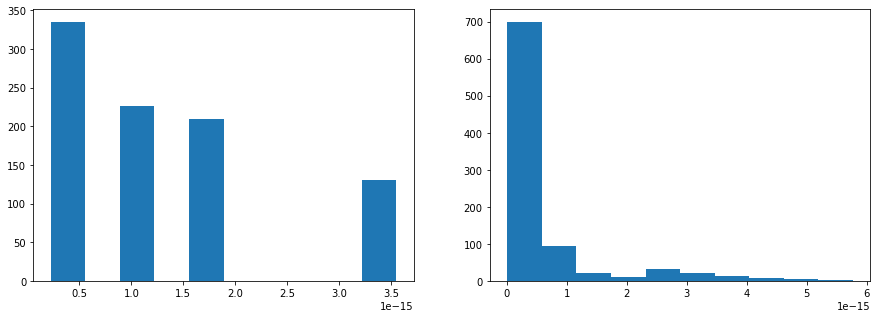

In [10]:
Mlzs = np.logspace(1, 5, 30)
ys = np.logspace(-2, np.log10(5), 30)
input_prms = np.array(list(product(Mlzs, ys)))
fs = np.arange(0.25, 1024, 1/4)
max_abs_err_abs_arr = np.array([None]*len(input_prms))
max_abs_err_phase_arr = np.array([None]*len(input_prms))
i=0
for inp in tqdm(input_prms):
    Mlz, y = inp
    wfs = [pnt_lens_cy.w_of_f(f, ml=Mlz, zl=0) for f in fs]
    Ffs_py = np.array([pnt_lens_py.point_Fw_geo(wf, y=y) for wf in wfs])
    Ffs_cy = np.array([pnt_lens_cy.point_Fw_geo(wf, y=y) for wf in wfs])
    max_abs_err_abs = np.max(np.abs(np.abs(Ffs_py) - np.abs(Ffs_cy)))
    max_abs_err_phase = np.max(np.abs(np.angle(Ffs_py) - np.angle(Ffs_cy)))
    max_abs_err_abs_arr[i] = max_abs_err_abs
    max_abs_err_phase_arr[i] = max_abs_err_phase
    i+=1
    
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(max_abs_err_abs_arr)
ax[1].hist(max_abs_err_phase_arr)
plt.show()    